# **Installing and Importing all the necessary libraries**

In [ ]:
!pip install langdetect
!pip install langdetect googletrans==4.0.0-rc1 vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993227 sha256=0dfec753fed959f713f974d2b95bcc1c4e5969c4e54fe74ae17e21477ccd50e5
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 

In [ ]:
!pip install nltk

In [ ]:
!pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 3.1 MB/s eta 0:00:00


In [ ]:
!pip install wordsegment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 15.6 MB/s eta 0:00:00


In [ ]:
!python -m spacy download en_core_web_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 14.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import numpy as np
import pandas as pd
import string
import spacy
import re
import emoji
import random
from collections import Counter
import seaborn as sns
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import emoji
from wordsegment import load, segment
from string import punctuation
from collections import Counter
import nltk
from nltk import bigrams, trigrams
from nltk.stem import WordNetLemmatizer, PorterStemmer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
%matplotlib inline


# Initialize wordsegment
load()

import warnings
warnings.filterwarnings("ignore")

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
from google.colab import files
uploaded= files.upload()

Saving amazon_reviews.csv to amazon_reviews.csv


In [ ]:
df = pd.read_csv('amazon_reviews.csv')
df

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [ ]:
df= df.drop(["rating",'date','variation','feedback'],axis=1)
df

,verified_reviews
0,Love my Echo!
1,Loved it!
2,"Sometimes while playing a game, you can answer..."
3,I have had a lot of fun with this thing. My 4 ...
4,Music
...,...
3145,"Perfect for kids, adults and everyone in betwe..."
3146,"Listening to music, searching locations, check..."
3147,"I do love these things, i have them running my..."
3148,Only complaint I have is that the sound qualit...


In [ ]:
df= df.head(1100)
df

,verified_reviews
0,Love my Echo!
1,Loved it!
2,"Sometimes while playing a game, you can answer..."
3,I have had a lot of fun with this thing. My 4 ...
4,Music
...,...
1095,Love my Echo Spot!
1096,"Great deal, great product!"
1097,Perfect
1098,i had a couple of echo dots previously - bough...


In [ ]:
reviews = df[['verified_reviews']].rename(columns={'verified_reviews': 'Review'})
reviews

,Review
0,Love my Echo!
1,Loved it!
2,"Sometimes while playing a game, you can answer..."
3,I have had a lot of fun with this thing. My 4 ...
4,Music
...,...
1095,Love my Echo Spot!
1096,"Great deal, great product!"
1097,Perfect
1098,i had a couple of echo dots previously - bough...


In [ ]:
# creating a copy of actual reviews for EDA
reviews_ = reviews.copy()
reviews_

,Review
0,Love my Echo!
1,Loved it!
2,"Sometimes while playing a game, you can answer..."
3,I have had a lot of fun with this thing. My 4 ...
4,Music
...,...
1095,Love my Echo Spot!
1096,"Great deal, great product!"
1097,Perfect
1098,i had a couple of echo dots previously - bough...


# **Exploratory Data Analysis (EDA)**

#### Number of Words

In [ ]:
# Handle potential float values in 'Review' column
reviews_['word_count'] = reviews_['Review'].apply(lambda x: len(str(x).split()) if not isinstance(x, float) else 0)
reviews_[['Review','word_count']]

,Review,word_count
0,Love my Echo!,3
1,Loved it!,2
2,"Sometimes while playing a game, you can answer...",38
3,I have had a lot of fun with this thing. My 4 ...,34
4,Music,1
...,...,...
1095,Love my Echo Spot!,4
1096,"Great deal, great product!",4
1097,Perfect,1
1098,i had a couple of echo dots previously - bough...,88


#### Number of characters

In [ ]:
reviews_['character_count'] = reviews_['Review'].str.len()
reviews_[['Review','character_count']]

,Review,character_count
0,Love my Echo!,13.0
1,Loved it!,9.0
2,"Sometimes while playing a game, you can answer...",195.0
3,I have had a lot of fun with this thing. My 4 ...,172.0
4,Music,5.0
...,...,...
1095,Love my Echo Spot!,18.0
1096,"Great deal, great product!",26.0
1097,Perfect,7.0
1098,i had a couple of echo dots previously - bough...,493.0


#### Number of stopwords

In [ ]:
# Assuming your dataframe is named 'reviews_' and the review text is in 'review_text' column
stop_words = set(stopwords.words('english'))
# Handle potential float values in 'Review' column
reviews_['stopword_count'] = reviews_['Review'].apply(lambda x: sum(word in stop_words for word in str(x).lower().split()) if not isinstance(x, float) else 0)
reviews_[['Review','stopword_count']]

,Review,stopword_count
0,Love my Echo!,1
1,Loved it!,0
2,"Sometimes while playing a game, you can answer...",20
3,I have had a lot of fun with this thing. My 4 ...,15
4,Music,0
...,...,...
1095,Love my Echo Spot!,1
1096,"Great deal, great product!",0
1097,Perfect,0
1098,i had a couple of echo dots previously - bough...,32


#### Number of numerics

In [ ]:
import re

# Function to find numeric values in a review, handling non-string types
def find_numeric(x):
    if isinstance(x, str):  # Check if x is a string
        return re.findall(r'\d+', x)
    else:
        return []  # Return an empty list for non-string types

# Apply the function to find numeric values in each review
reviews_['numeric_values'] = reviews_['Review'].apply(find_numeric)

# Count the numeric values
reviews_['numeric_count'] = reviews_['numeric_values'].apply(len)
reviews_[['Review','numeric_count']]

,Review,numeric_count
0,Love my Echo!,0
1,Loved it!,0
2,"Sometimes while playing a game, you can answer...",0
3,I have had a lot of fun with this thing. My 4 ...,1
4,Music,0
...,...,...
1095,Love my Echo Spot!,0
1096,"Great deal, great product!",0
1097,Perfect,0
1098,i had a couple of echo dots previously - bough...,0


#### Number of Uppercase

In [ ]:
reviews_['uppercase_count'] = reviews_['Review'].apply(lambda x: sum(char.isupper() for char in str(x)) if not isinstance(x, float) else 0)
reviews_[['Review','uppercase_count']].head()

,Review,uppercase_count
0,Love my Echo!,2
1,Loved it!,1
2,"Sometimes while playing a game, you can answer...",3
3,I have had a lot of fun with this thing. My 4 ...,3
4,Music,1


#### Number of Rare Words

In [ ]:
# Handle potential float values in the 'Review' column
freq = pd.Series(' '.join(reviews_['Review'].astype(str)).split()).value_counts()[-10:]
freq

deal!           1
$20             1
Opening         1
Dot!!           1
essentially     1
overall         1
sh*t            1
scared          1
completely      1
lights&#34;,    1
Name: count, dtype: int64

### Number of Emojis

In [ ]:
reviews_['emoji_count'] = reviews_['Review'].apply(lambda x: sum(1 for char in str(x) if char in emoji.EMOJI_DATA))
reviews_[['Review','emoji_count']]

,Review,emoji_count
0,Love my Echo!,0
1,Loved it!,0
2,"Sometimes while playing a game, you can answer...",0
3,I have had a lot of fun with this thing. My 4 ...,0
4,Music,0
...,...,...
1095,Love my Echo Spot!,0
1096,"Great deal, great product!",0
1097,Perfect,0
1098,i had a couple of echo dots previously - bough...,0


### Number of Punctuations

In [ ]:
import pandas as pd
from string import punctuation

reviews_['punctuation_count'] = reviews_['Review'].astype(str).apply(lambda x:sum(char in punctuation for char in x)) # Convert the 'Review' column to string type before applying the lambda function
reviews_[['Review','punctuation_count']]

,Review,punctuation_count
0,Love my Echo!,1
1,Loved it!,1
2,"Sometimes while playing a game, you can answer...",3
3,I have had a lot of fun with this thing. My 4 ...,4
4,Music,0
...,...,...
1095,Love my Echo Spot!,1
1096,"Great deal, great product!",2
1097,Perfect,0
1098,i had a couple of echo dots previously - bough...,18


#      

# **1. Text Preprocessing**

In [ ]:
reviews

,Review
0,Love my Echo!
1,Loved it!
2,"Sometimes while playing a game, you can answer..."
3,I have had a lot of fun with this thing. My 4 ...
4,Music
...,...
1095,Love my Echo Spot!
1096,"Great deal, great product!"
1097,Perfect
1098,i had a couple of echo dots previously - bough...


### Normalization

In [ ]:
reviews['review_lower'] = reviews['Review'].str.lower()
reviews

,Review,review_lower
0,Love my Echo!,love my echo!
1,Loved it!,loved it!
2,"Sometimes while playing a game, you can answer...","sometimes while playing a game, you can answer..."
3,I have had a lot of fun with this thing. My 4 ...,i have had a lot of fun with this thing. my 4 ...
4,Music,music
...,...,...
1095,Love my Echo Spot!,love my echo spot!
1096,"Great deal, great product!","great deal, great product!"
1097,Perfect,perfect
1098,i had a couple of echo dots previously - bough...,i had a couple of echo dots previously - bough...


### Removing URL's (If exists)

In [ ]:
reviews['review_no_urls'] = reviews['review_lower'].astype(str).apply(lambda x: re.sub(r'http\S+|www\S+|https\S+', '', x, flags=re.MULTILINE))
reviews['review_no_urls']

0                                           love my echo!
1                                               loved it!
2       sometimes while playing a game, you can answer...
3       i have had a lot of fun with this thing. my 4 ...
4                                                   music
                              ...                        
1095                                   love my echo spot!
1096                           great deal, great product!
1097                                              perfect
1098    i had a couple of echo dots previously - bough...
1099    bought this for my bedroom and the show for my...
Name: review_no_urls, Length: 1100, dtype: object

### Removing emojis

In [ ]:
reviews['review_no_emojis'] = reviews['review_no_urls'].apply(lambda x: emoji.replace_emoji(x, replace=''))
reviews['review_no_emojis']

0                                           love my echo!
1                                               loved it!
2       sometimes while playing a game, you can answer...
3       i have had a lot of fun with this thing. my 4 ...
4                                                   music
                              ...                        
1095                                   love my echo spot!
1096                           great deal, great product!
1097                                              perfect
1098    i had a couple of echo dots previously - bough...
1099    bought this for my bedroom and the show for my...
Name: review_no_emojis, Length: 1100, dtype: object

### Removing Punctuations

In [ ]:
reviews['review_no_punctuation'] = reviews['review_no_emojis'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
reviews['review_no_punctuation']

0                                            love my echo
1                                                loved it
2       sometimes while playing a game you can answer ...
3       i have had a lot of fun with this thing my 4 y...
4                                                   music
                              ...                        
1095                                    love my echo spot
1096                             great deal great product
1097                                              perfect
1098    i had a couple of echo dots previously  bought...
1099    bought this for my bedroom and the show for my...
Name: review_no_punctuation, Length: 1100, dtype: object

### Removing Special Characters (Emojis, Symbols, etc..)

In [ ]:
reviews['review_no_special'] = reviews['review_no_punctuation'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))
reviews['review_no_special']

0                                            love my echo
1                                                loved it
2       sometimes while playing a game you can answer ...
3       i have had a lot of fun with this thing my  yr...
4                                                   music
                              ...                        
1095                                    love my echo spot
1096                             great deal great product
1097                                              perfect
1098    i had a couple of echo dots previously  bought...
1099    bought this for my bedroom and the show for my...
Name: review_no_special, Length: 1100, dtype: object

### Tokenization

In [ ]:
reviews['review_tokenized'] = reviews['review_no_special'].apply(word_tokenize)
reviews['review_tokenized']

0                                        [love, my, echo]
1                                             [loved, it]
2       [sometimes, while, playing, a, game, you, can,...
3       [i, have, had, a, lot, of, fun, with, this, th...
4                                                 [music]
                              ...                        
1095                               [love, my, echo, spot]
1096                        [great, deal, great, product]
1097                                            [perfect]
1098    [i, had, a, couple, of, echo, dots, previously...
1099    [bought, this, for, my, bedroom, and, the, sho...
Name: review_tokenized, Length: 1100, dtype: object

### Removing Stopwords

In [ ]:
stop_words = set(stopwords.words('english'))
custom_stopwords = set([
    "a", "able", "about", "above", "abst", "accordance", "according", "accordingly", "across", "act", "actually", "added", "adj",
    "affected", "affecting", "affects", "after", "afterwards", "again", "against", "ah", "all", "almost", "alone", "along", "already",
    "also", "although", "always", "am", "among", "amongst", "an", "and", "announce", "another", "any", "anybody", "anyhow", "anymore",
    "anyone", "anything", "anyway", "anyways", "anywhere", "apparently", "approximately", "are", "aren", "arent", "arise", "around", "as",
    "aside", "ask", "asking", "at", "auth", "available", "away", "awfully", "b", "back", "be", "became", "because", "become", "becomes",
    "becoming", "been", "before", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", "being", "believe", "below",
    "beside", "besides", "between", "beyond", "biol", "both", "brief", "briefly", "but", "by", "c", "ca", "came", "can", "cannot",
    "can't", "cause", "causes", "certain", "certainly", "co", "com", "come", "comes", "contain", "containing", "contains", "could",
    "couldnt", "d", "date", "did", "didn't", "different", "do", "does", "doesn't", "doing", "done", "don't", "down", "downwards",
    "due", "during", "e", "each", "ed", "edu", "effect", "eg", "eight", "eighty", "either", "else", "elsewhere", "end", "ending",
    "enough", "especially", "et", "et-al", "etc", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex",
    "except", "f", "far", "few", "ff", "fifth", "first", "five", "fix", "followed", "following", "follows", "for", "former", "formerly",
    "forth", "found", "four", "from", "further", "furthermore", "g", "gave", "get", "gets", "getting", "give", "given", "gives",
    "giving", "go", "goes", "gone", "got", "gotten", "h", "had", "happens", "hardly", "has", "hasn't", "have", "haven't", "having",
    "he", "hed", "hence", "her", "here", "hereafter", "hereby", "herein", "heres", "hereupon", "hers", "herself", "hes", "hi", "hid",
    "him", "himself", "his", "hither", "home", "how", "howbeit", "however", "hundred", "i", "id", "ie", "if", "i'll", "im", "immediate",
    "immediately", "importance", "important", "in", "inc", "indeed", "index", "information", "instead", "into", "invention", "inward",
    "is", "isn't", "it", "itd", "it'll", "its", "itself", "i've", "j", "just", "k", "keep", "keeps", "kept", "kg", "km", "know",
    "known", "knows", "l", "largely", "last", "lately", "later", "latter", "latterly", "least", "less", "lest", "let", "lets", "like",
    "liked", "likely", "line", "ll", "look", "looking", "looks", "ltd", "m", "made", "mainly", "make", "makes", "many", "may", "maybe",
    "me", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "million", "miss", "ml", "more", "moreover", "most",
    "mostly", "mr", "mrs", "much", "mug", "must", "my", "myself", "n", "na", "name", "namely", "nay", "nd", "near", "nearly",
    "necessarily", "necessary", "need", "needs", "neither", "never", "nevertheless", "new", "next", "nine", "ninety", "no", "nobody",
    "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "nothing", "now", "nowhere", "o", "obtain",
    "obtained", "obviously", "of", "off", "often", "oh", "ok", "okay", "old", "omitted", "on", "once", "one", "ones", "only", "onto",
    "or", "ord", "other", "others", "otherwise", "ought", "our", "ours", "ourselves", "out", "outside", "over", "overall", "owing",
    "own", "p", "page", "pages", "part", "particular", "particularly", "past", "per", "perhaps", "placed", "please", "plus", "poorly",
    "possible", "possibly", "potentially", "pp", "predominantly", "present", "previously", "primarily", "probably", "promptly", "proud",
    "provides", "put", "q", "que", "quickly", "quite", "qv", "r", "ran", "rather", "rd", "re", "readily", "really", "recent",
    "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "respectively", "resulted", "resulting", "results", "right", "run", "s", "said", "same",
    "saw", "say", "saying", "says", "sec", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self",
    "selves", "sent", "seven", "several", "shall", "she", "shed", "she'll", "shes", "should", "shouldn't", "show", "showed",
    "shown", "showns", "shows", "significant", "significantly", "similar", "similarly", "since", "six", "slightly", "so", "some",
    "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry",
    "specifically", "specified", "specify", "specifying", "still", "stop", "strongly", "sub", "substantially", "successfully",
    "such", "sufficiently", "suggest", "sup", "sure", "t", "take", "taken", "taking", "tell", "tends", "th", "than", "thank",
    "thanks", "thanx", "that", "that'll", "thats", "that've", "the", "their", "theirs", "them", "themselves", "then", "thence",
    "there", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "thereto",
    "thereupon", "there've", "these", "they", "theyd", "they'll", "theyre", "they've", "think", "this", "those", "thou",
    "though", "thoughh", "thousand", "throug", "through", "throughout", "thru", "thus", "til", "tip", "to", "together", "too",
    "took", "toward", "towards", "tried", "tries", "truly", "try", "trying", "ts", "twice", "two", "u", "un", "under",
    "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "up", "upon", "ups", "us", "use", "used", "useful",
    "usefully", "usefulness", "uses", "using", "usually", "v", "value", "various", "ve", "very", "via", "viz", "vol", "vols",
    "vs", "w", "want", "wants", "was", "wasnt", "way", "we", "wed", "welcome", "well", "went", "were", "werent", "weve",
    "what", "whatever", "what'll", "whats", "when", "whence", "whenever", "where", "whereafter", "whereas", "whereby",
    "wherein", "wheres", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever",
    "whole", "wholl", "whom", "whomever", "whos", "whose", "why", "widely", "willing", "wish", "with", "within", "without",
    "wont", "words", "world", "would", "wouldnt", "www", "x", "y", "yes", "yet", "you", "youd", "youll", "your", "youre",
    "yours", "yourself", "yourselves", "youve", "z", "zero"])


# Adding custom stopwords to the existing set
stop_words.update(custom_stopwords)

reviews['review_no_stopwords'] = reviews['review_tokenized'].apply(lambda x: [word for word in x if word not in stop_words])
reviews['review_no_stopwords']

0                                            [love, echo]
1                                                 [loved]
2       [playing, game, answer, question, correctly, a...
3       [lot, fun, thing, yr, learns, dinosaurs, contr...
4                                                 [music]
                              ...                        
1095                                   [love, echo, spot]
1096                        [great, deal, great, product]
1097                                            [perfect]
1098    [couple, echo, dots, bought, ring, doorbell, v...
1099    [bought, bedroom, living, room, love, spot, pe...
Name: review_no_stopwords, Length: 1100, dtype: object

## Stemming (optional)

In [ ]:
stemmer = PorterStemmer()
reviews['review_stemmed'] = reviews['review_no_stopwords'].apply(lambda x: [stemmer.stem(word) for word in x])
reviews['review_stemmed']

0                                            [love, echo]
1                                                  [love]
2       [play, game, answer, question, correctli, alex...
3       [lot, fun, thing, yr, learn, dinosaur, control...
4                                                 [music]
                              ...                        
1095                                   [love, echo, spot]
1096                        [great, deal, great, product]
1097                                            [perfect]
1098    [coupl, echo, dot, bought, ring, doorbel, vide...
1099    [bought, bedroom, live, room, love, spot, perf...
Name: review_stemmed, Length: 1100, dtype: object

### Lemmatization

In [ ]:
lemmatizer = WordNetLemmatizer()
reviews['review_lemmatized'] = reviews['review_no_stopwords'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
reviews['review_lemmatized']

0                                            [love, echo]
1                                                 [loved]
2       [playing, game, answer, question, correctly, a...
3       [lot, fun, thing, yr, learns, dinosaur, contro...
4                                                 [music]
                              ...                        
1095                                   [love, echo, spot]
1096                        [great, deal, great, product]
1097                                            [perfect]
1098    [couple, echo, dot, bought, ring, doorbell, vi...
1099    [bought, bedroom, living, room, love, spot, pe...
Name: review_lemmatized, Length: 1100, dtype: object

## Words Correction
(Ex: verygood --> very good,
notbad --> not bad, etc.,)

In [ ]:
reviews['review_corrected'] = reviews['review_lemmatized'].apply(lambda x: [' '.join(segment(word)) for word in x])
reviews['review_corrected']

0                                            [love, echo]
1                                                 [loved]
2       [playing, game, answer, question, correctly, a...
3       [lot, fun, thing, yr, learns, dinosaur, contro...
4                                                 [music]
                              ...                        
1095                                   [love, echo, spot]
1096                        [great, deal, great, product]
1097                                            [perfect]
1098    [couple, echo, dot, bought, ring, doorbell, vi...
1099    [bought, bedroom, living, room, love, spot, pe...
Name: review_corrected, Length: 1100, dtype: object

In [ ]:
reviews['cleaned_review'] = reviews['review_corrected'].apply(lambda x: ' '.join(x))
reviews['cleaned_review']

0                                               love echo
1                                                   loved
2       playing game answer question correctly alexa w...
3       lot fun thing yr learns dinosaur control light...
4                                                   music
                              ...                        
1095                                       love echo spot
1096                             great deal great product
1097                                              perfect
1098    couple echo dot bought ring doorbell video clo...
1099    bought bedroom living room love spot perfect b...
Name: cleaned_review, Length: 1100, dtype: object

In [ ]:
# Replace the original reviews with the cleaned reviews
reviews['Review'] = reviews['cleaned_review']

In [ ]:
# Drop intermediate columns
reviews = reviews.drop(columns=['review_lower', 'review_no_urls', 'review_no_emojis', 'review_no_punctuation', 'review_no_special', 'review_tokenized', 'review_no_stopwords', 'review_stemmed','review_lemmatized', 'review_corrected', 'cleaned_review'])
reviews

,Review
0,love echo
1,loved
2,playing game answer question correctly alexa w...
3,lot fun thing yr learns dinosaur control light...
4,music
...,...
1095,love echo spot
1096,great deal great product
1097,perfect
1098,couple echo dot bought ring doorbell video clo...


#           

# **Data Visualization**

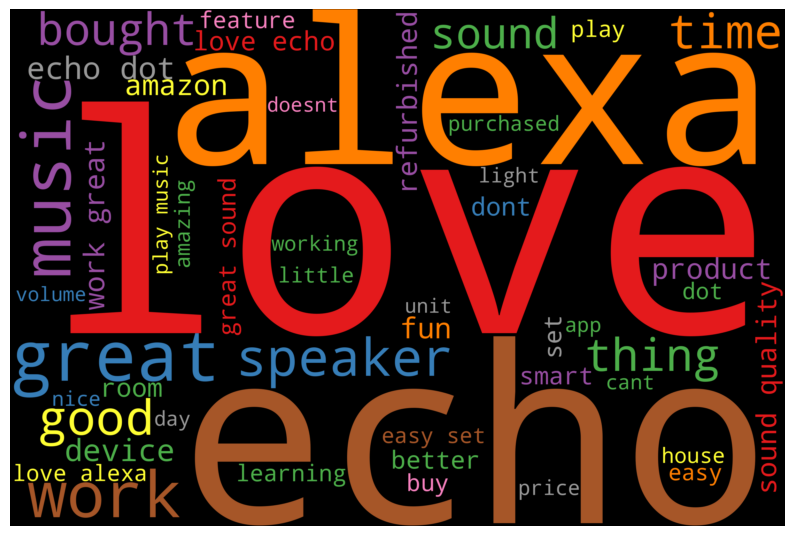

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all cleaned reviews into a single string
all_cleaned_reviews = ' '.join(reviews['Review'])

# Generate the word cloud
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=50,
                   colormap='Set1',stopwords=STOPWORDS).generate(all_cleaned_reviews)

# Display the word cloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Distribution plot for Review length

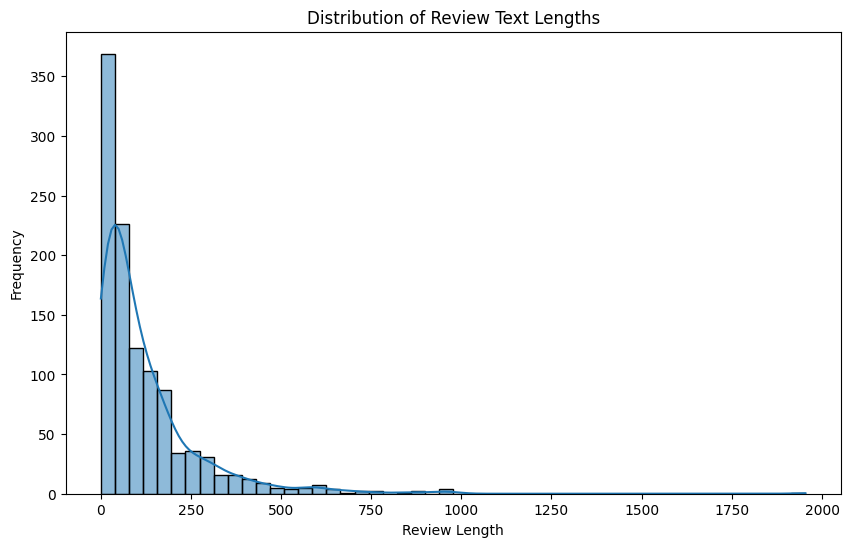

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(reviews_['character_count'],bins=50,kde=True)
plt.title('Distribution of Review Text Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

### Countplot

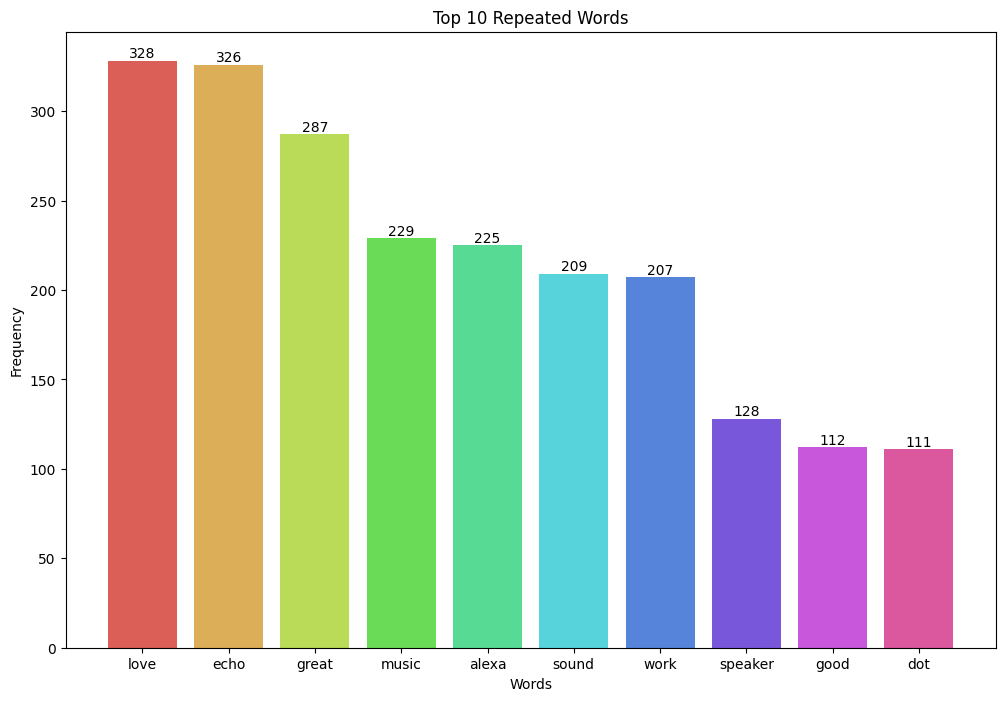

In [ ]:
# Tokenize the combined string
words = all_cleaned_reviews.split()

# Count the frequency of each word
word_counts = Counter(words)

# Get the top 10 most common words
top_10_words = word_counts.most_common(10)

# Convert the top 10 words into a DataFrame for easier plotting
top_10_df = pd.DataFrame(top_10_words, columns=['word', 'count'])

# Set the palette
palette = sns.color_palette("hls", len(top_10_df['word']))

# Plot the most common words
plt.figure(figsize=(12, 8))
bars = plt.bar(top_10_df['word'], top_10_df['count'], color=palette)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Repeated Words')
plt.xticks(rotation=0)

# Add value labels on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, int(yval), ha='center', va='bottom')

plt.show()

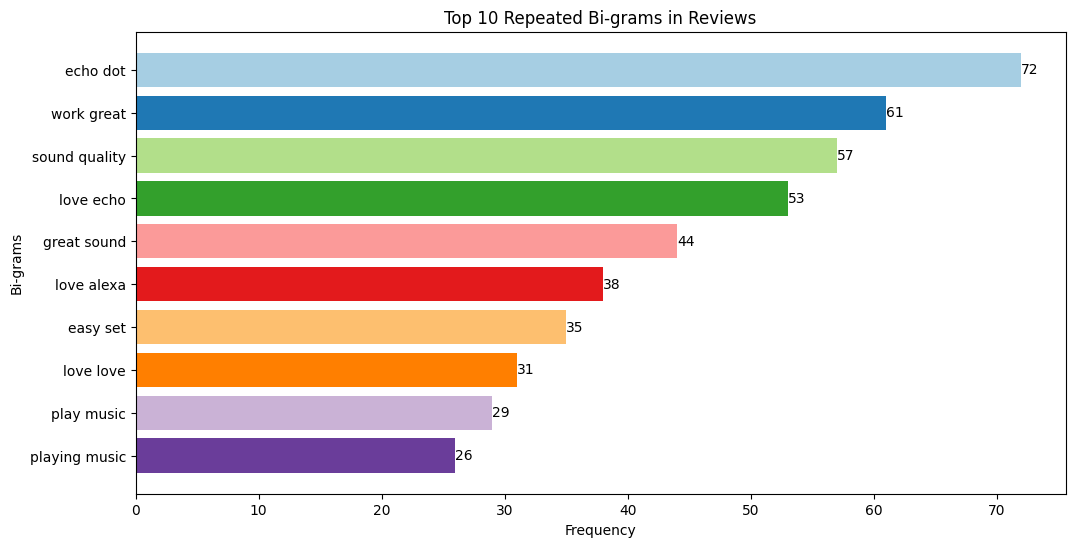

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd
from nltk import bigrams

# Combine all cleaned reviews into a single string
all_cleaned_reviews = ' '.join(reviews['Review'])

# Tokenize the combined string into words
words = all_cleaned_reviews.split()

# Generate bi-grams from the list of words
bi_grams = list(bigrams(words))

# Count the frequency of each bi-gram
bi_gram_counts = Counter(bi_grams)

# Get the top 10 most common bi-grams
top_10_bi_grams = bi_gram_counts.most_common(10)

# Convert the top 10 bi-grams into a DataFrame for easier plotting
top_10_bi_grams_df = pd.DataFrame(top_10_bi_grams, columns=['bi_gram', 'count'])

# Convert bi-gram tuples to strings for better readability in the plot
top_10_bi_grams_df['bi_gram'] = top_10_bi_grams_df['bi_gram'].apply(lambda x: ' '.join(x))

# Sort the DataFrame by count in descending order
top_10_bi_grams_df = top_10_bi_grams_df.sort_values(by='count', ascending=False)

# Plot the horizontal bar plot with different colors
plt.figure(figsize=(12, 6))
bars = plt.barh(top_10_bi_grams_df['bi_gram'], top_10_bi_grams_df['count'], color=plt.cm.Paired.colors)
plt.xlabel('Frequency')
plt.ylabel('Bi-grams')
plt.title('Top 10 Repeated Bi-grams in Reviews')

# Invert y-axis to have the highest count on top
plt.gca().invert_yaxis()

# Add value labels on the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2.0, int(width), ha='left', va='center')

plt.show()

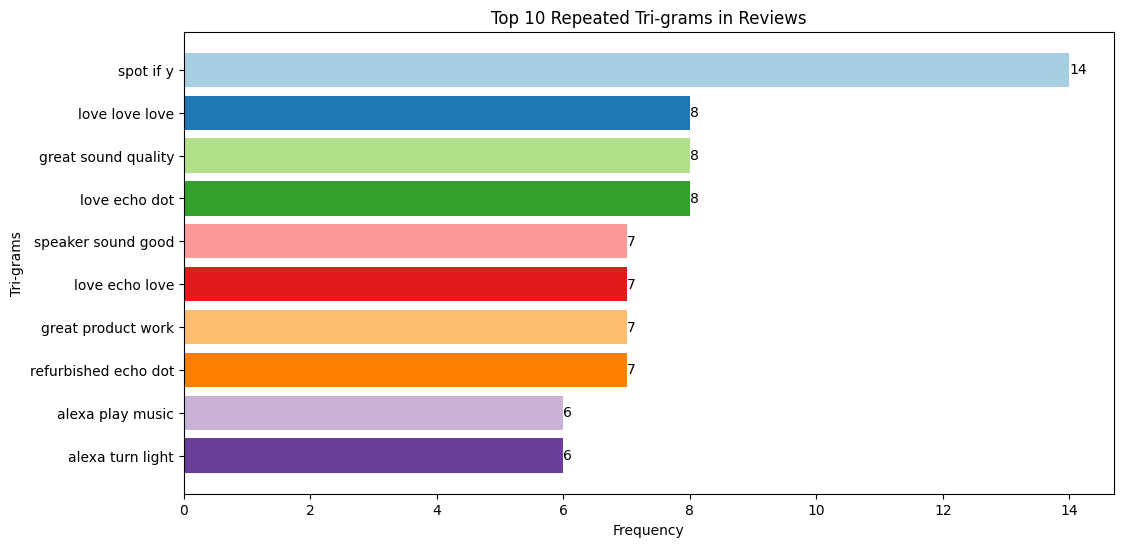

In [ ]:
# Combine all cleaned reviews into a single string
all_cleaned_reviews = ' '.join(reviews['Review'])

# Tokenize the combined string into words
words = all_cleaned_reviews.split()

# Generate tri-grams from the list of words
tri_grams = list(trigrams(words))

# Count the frequency of each tri-gram
tri_gram_counts = Counter(tri_grams)

# Get the top 10 most common tri-grams
top_10_tri_grams = tri_gram_counts.most_common(10)

# Convert the top 10 tri-grams into a DataFrame for easier plotting
top_10_tri_grams_df = pd.DataFrame(top_10_tri_grams, columns=['tri_gram', 'count'])

# Convert tri-gram tuples to strings for better readability in the plot
top_10_tri_grams_df['tri_gram'] = top_10_tri_grams_df['tri_gram'].apply(lambda x: ' '.join(x))

# Sort the DataFrame by count in descending order
top_10_tri_grams_df = top_10_tri_grams_df.sort_values(by='count', ascending=False)

# Plot the horizontal bar plot with different colors
plt.figure(figsize=(12, 6))
bars = plt.barh(top_10_tri_grams_df['tri_gram'], top_10_tri_grams_df['count'], color=plt.cm.Paired.colors)
plt.xlabel('Frequency')
plt.ylabel('Tri-grams')
plt.title('Top 10 Repeated Tri-grams in Reviews')

# Invert y-axis to have the highest count on top
plt.gca().invert_yaxis()

# Add value labels on the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2.0, int(width), ha='left', va='center')

plt.show()

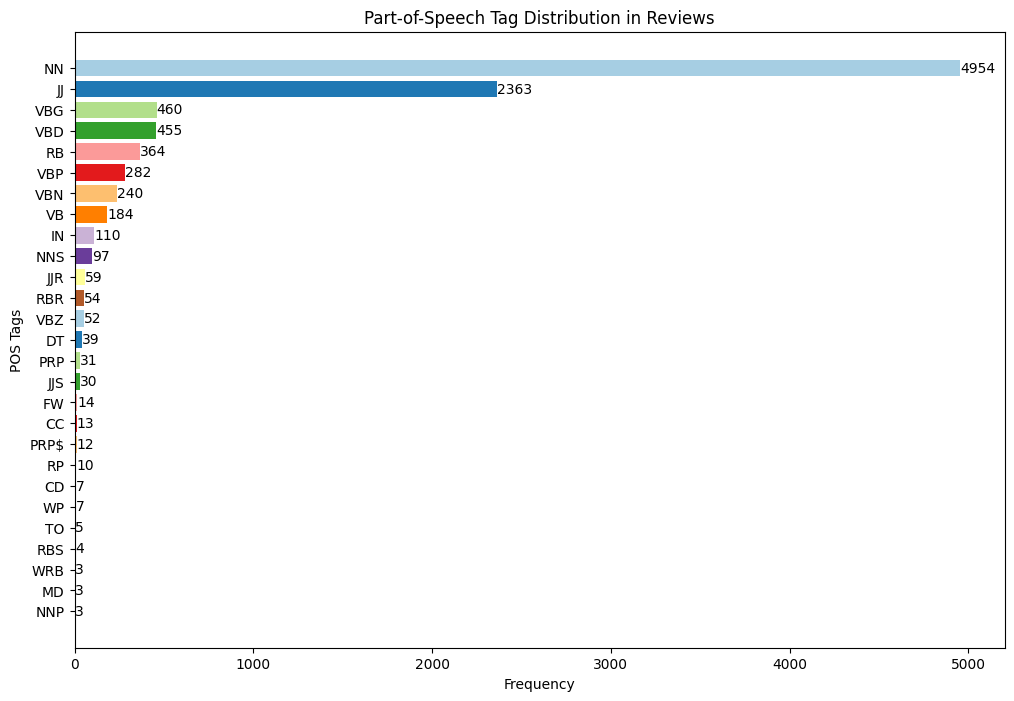

In [ ]:
import nltk
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd

# Combine all cleaned reviews into a single string
all_cleaned_reviews = ' '.join(reviews['Review'])

# Tokenize the text into words
words = nltk.word_tokenize(all_cleaned_reviews)

# Tag each word with its POS tag
pos_tags = nltk.pos_tag(words)

# Extract the POS tags from the tagged words
tags = [tag for word, tag in pos_tags]

# Count the frequency of each POS tag
tag_counts = Counter(tags)

# Convert the tag counts into a DataFrame for easier plotting
tag_counts_df = pd.DataFrame(tag_counts.items(), columns=['POS Tag', 'Count'])

# Sort the DataFrame by count in descending order
tag_counts_df = tag_counts_df.sort_values(by='Count', ascending=False)

# Plot the horizontal bar plot
plt.figure(figsize=(12, 8))
bars = plt.barh(tag_counts_df['POS Tag'], tag_counts_df['Count'], color=plt.cm.Paired.colors)
plt.xlabel('Frequency')
plt.ylabel('POS Tags')
plt.title('Part-of-Speech Tag Distribution in Reviews')

# Add value labels on the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2.0, int(width), ha='left', va='center')

plt.gca().invert_yaxis()  # Invert y-axis to have the highest count on top
plt.show()

#      

# **Emotion Mining/Sentiment Analysis**

In [ ]:
sent_df = reviews.copy()
sent_df.rename(columns = {'Review' : 'sentence'}, inplace = True)
sent_df

,sentence
0,love echo
1,loved
2,playing game answer question correctly alexa w...
3,lot fun thing yr learns dinosaur control light...
4,music
...,...
1095,love echo spot
1096,great deal great product
1097,perfect
1098,couple echo dot bought ring doorbell video clo...


In [ ]:
from google.colab import files
uploaded= files.upload()

Saving Afinn.csv to Afinn.csv


In [ ]:
# Emotion Lexicon - Affin
affin=pd.read_csv('Afinn.csv',sep=',',encoding='Latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [ ]:
affinity_scores = affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [ ]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [ ]:
# manual testing
calculate_sentiment(text='nice')

3

In [ ]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0        3
1        3
2       -2
3        7
4        0
        ..
1095     3
1096     6
1097     3
1098     1
1099    13
Name: sentiment_value, Length: 1100, dtype: int64

In [ ]:
# how many words are there in a sentence?
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0        2
1        1
2       10
3       15
4        1
        ..
1095     3
1096     4
1097     1
1098    39
1099    21
Name: word_count, Length: 1100, dtype: int64

In [ ]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

,sentence,sentiment_value,word_count
0,love echo,3,2
1,loved,3,1
3,lot fun thing yr learns dinosaur control light...,7,15
5,received echo gift needed bluetooth play music...,3,13
6,cell phone feature i pad great alarm deaf hear...,4,24
...,...,...,...
1095,love echo spot,3,3
1096,great deal great product,6,4
1097,perfect,3,1
1098,couple echo dot bought ring doorbell video clo...,1,39


In [ ]:
# Negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<0]

,sentence,sentiment_value,word_count
2,playing game answer question correctly alexa w...,-2,10
49,apple play specific list music amazon spot if ...,-1,18
80,little nervous received echo tech savvy bit in...,-1,17
109,outlet work disappointed,-2,3
112,sound troubling paid extra money access song d...,-1,20
...,...,...,...
1019,speaker stream music month kinda useless,-2,6
1022,echo doesnt built battery plugged time inconve...,-2,7
1060,great lyric time freeze doesnt respond properl...,-3,17
1067,echo spot bought alarm clock negative didnt wa...,-8,24


In [ ]:
# Neutral sentiment score of the whole review
sent_df[sent_df['sentiment_value']==0]

,sentence,sentiment_value,word_count
4,music,0,1
7,ive purchased working room house feature offer...,0,15
10,year dad talk constantly,0,4
14,expected,0,1
15,love wife hate,0,3
...,...,...,...
1054,worthy successor echo dot bed room alarm clock...,0,10
1059,honestly time dont bought smaller exact thing ...,0,11
1070,slow compared echo,0,3
1073,alexa spot lot,0,3


In [ ]:
sent_df['sentiment_value'].describe()

count    1100.000000
mean        3.445455
std         3.769246
min        -8.000000
25%         0.000000
50%         3.000000
75%         5.000000
max        26.000000
Name: sentiment_value, dtype: float64

In [ ]:
# Adding index cloumn
sent_df['index']=range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,love echo,3,2,0
1,loved,3,1,1
2,playing game answer question correctly alexa w...,-2,10,2
3,lot fun thing yr learns dinosaur control light...,7,15,3
4,music,0,1,4
...,...,...,...,...
1095,love echo spot,3,3,1095
1096,great deal great product,6,4,1096
1097,perfect,3,1,1097
1098,couple echo dot bought ring doorbell video clo...,1,39,1098


In [ ]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count,index
1067,echo spot bought alarm clock negative didnt wa...,-8,24,1067
418,wanted radio intercom terrible fm reception li...,-6,45,418
601,bad bad speaker sound,-6,4,601
504,wrong rep spoke replacement registered price d...,-4,13,504
619,trouble program downloaded phone ended compute...,-4,40,619
...,...,...,...,...
258,pleasantly surprised sound quality echo big fa...,22,66,258
953,pleasantly surprised sound quality echo big fa...,22,66,953
630,device work perfectly good price love alexa gr...,25,27,630
158,prime day gen echo sale resist smart set happi...,26,63,158


<Axes: xlabel='sentiment_value', ylabel='Density'>

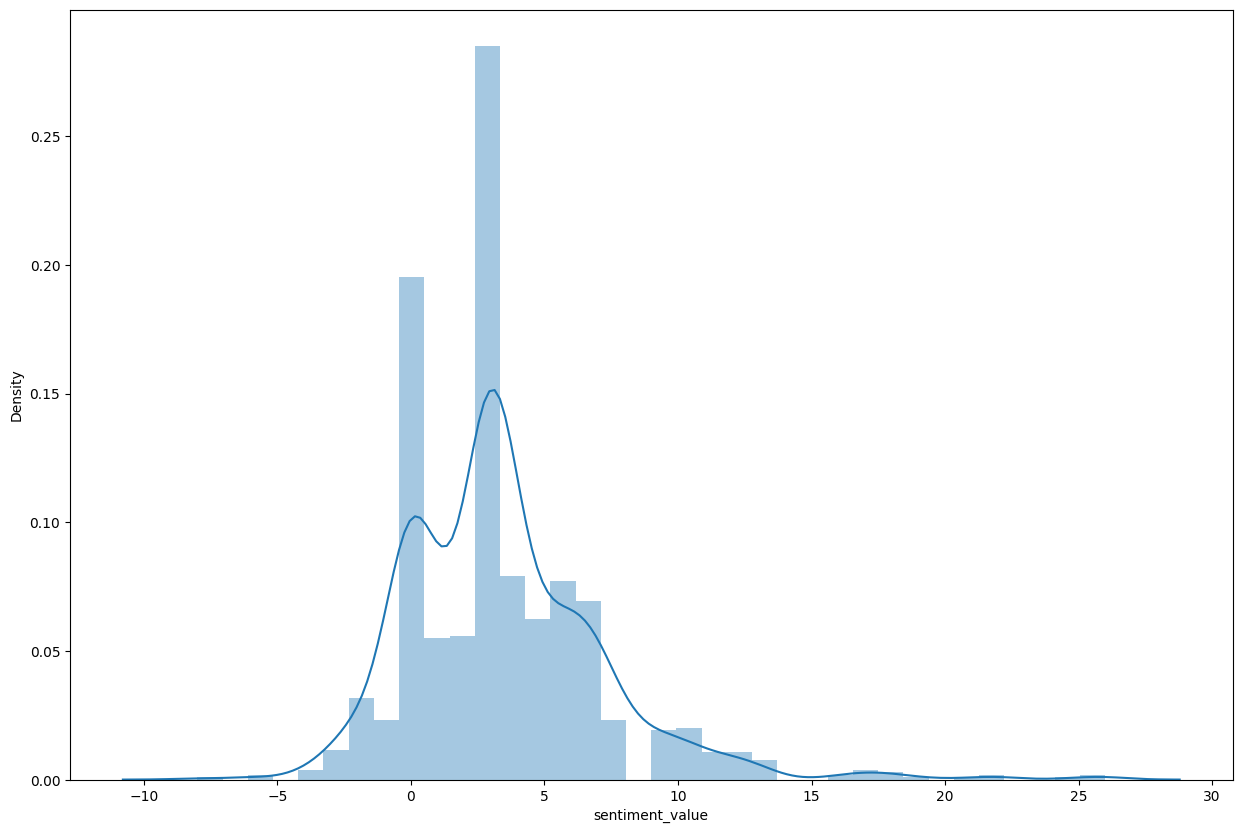

In [ ]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])

<Axes: xlabel='index', ylabel='sentiment_value'>

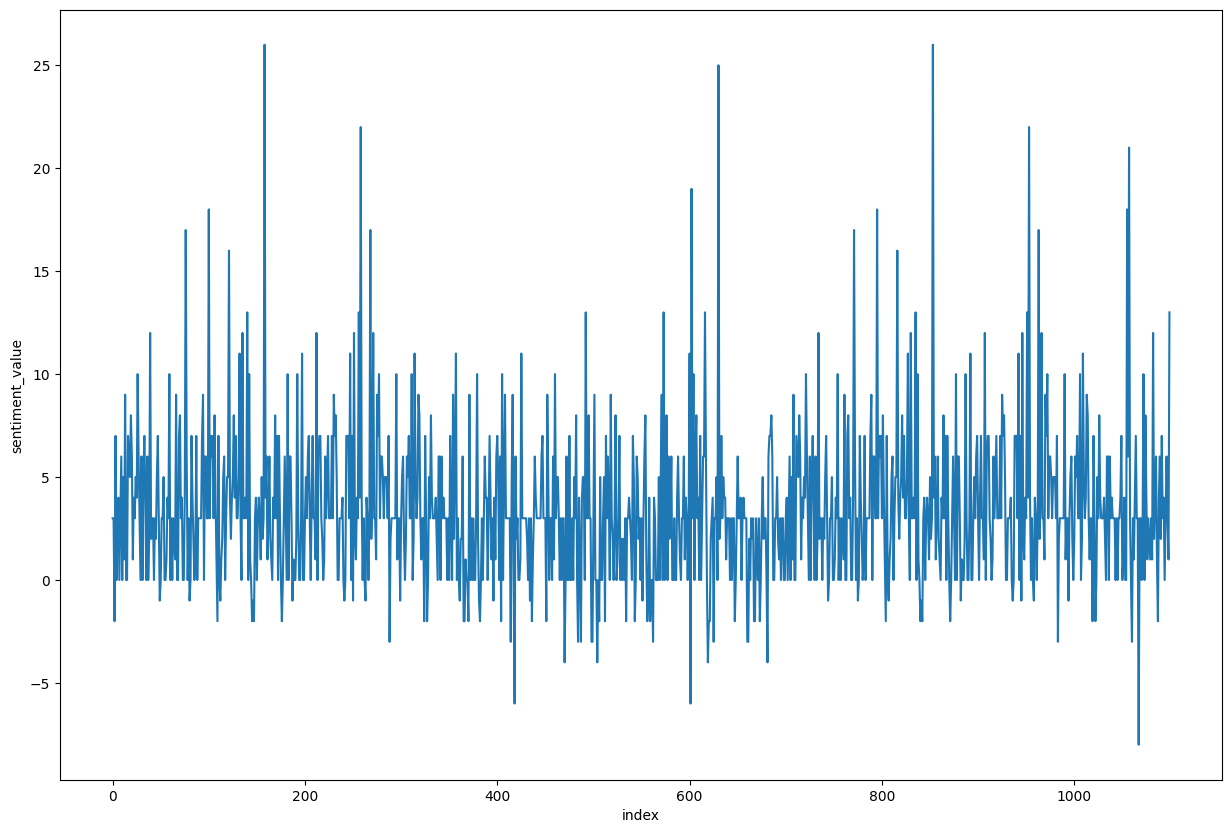

In [ ]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<Axes: title={'center': 'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

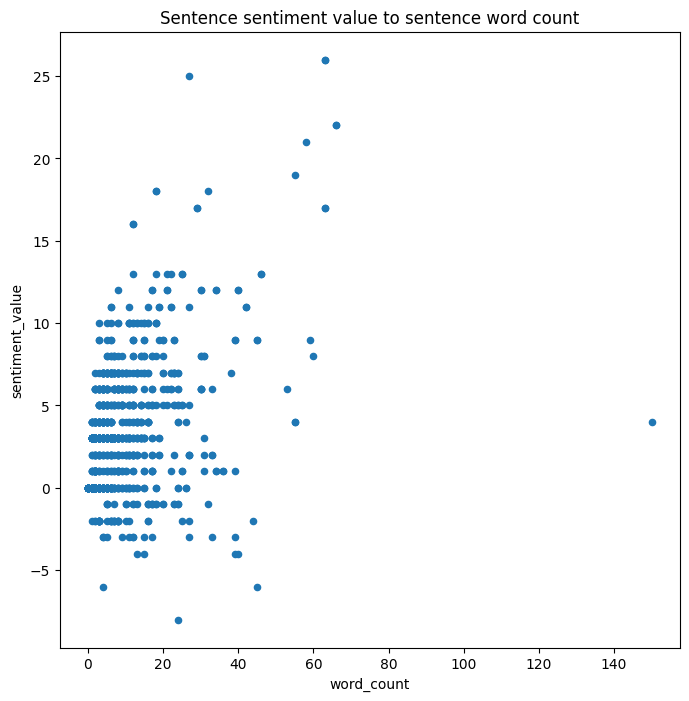

In [ ]:
# Correlation analysis
sent_df.plot.scatter(x='word_count',y='sentiment_value',figsize=(8,8),title='Sentence sentiment value to sentence word count')

# 1. **Afinn Sentiment Analysis**:

In [ ]:
def get_sentiment(sentiment_value):
    if sentiment_value < 0:
        return 'Negative'
    elif sentiment_value >0:
        return 'Positive'
    else:
        return 'Neutral'

In [ ]:
# Apply the get_sentiment function to the sentiment_value column
sent_df['Sentiment'] = sent_df['sentiment_value'].apply(get_sentiment)
sent_df

,sentence,sentiment_value,word_count,index,Sentiment
0,love echo,3,2,0,Positive
1,loved,3,1,1,Positive
2,playing game answer question correctly alexa w...,-2,10,2,Negative
3,lot fun thing yr learns dinosaur control light...,7,15,3,Positive
4,music,0,1,4,Neutral
...,...,...,...,...,...
1095,love echo spot,3,3,1095,Positive
1096,great deal great product,6,4,1096,Positive
1097,perfect,3,1,1097,Positive
1098,couple echo dot bought ring doorbell video clo...,1,39,1098,Positive


In [ ]:
# re-ordering the columns
sent_df = sent_df[['index', 'sentence','word_count', 'sentiment_value', 'Sentiment']]
sent_df

,index,sentence,word_count,sentiment_value,Sentiment
0,0,love echo,2,3,Positive
1,1,loved,1,3,Positive
2,2,playing game answer question correctly alexa w...,10,-2,Negative
3,3,lot fun thing yr learns dinosaur control light...,15,7,Positive
4,4,music,1,0,Neutral
...,...,...,...,...,...
1095,1095,love echo spot,3,3,Positive
1096,1096,great deal great product,4,6,Positive
1097,1097,perfect,1,3,Positive
1098,1098,couple echo dot bought ring doorbell video clo...,39,1,Positive


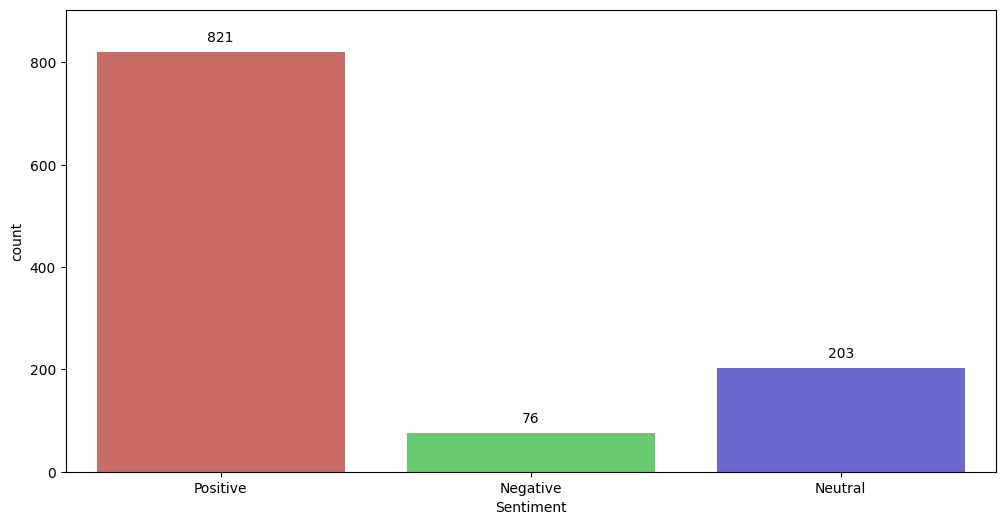

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get max count from the dataframe
max_count = sent_df['Sentiment'].value_counts().max()

plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Sentiment', data=sent_df, palette='hls')

# Set y-axis limits slightly higher than the max count
plt.ylim(0, max_count + max_count * 0.1)  # Add a 10% buffer

# Annotate each bar with its count as integer
for p in ax.patches:
  ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
              ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")


type_ = ["Positive", "Negative", "Neutral"]
fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Pie(labels=type_, values=sent_df['Sentiment'].value_counts(), name="sentiment"))

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Sentiment Analysis",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Afinn', x=0.5, y=0.5, font_size=40, showarrow=False)],
    width=800,  # Adjust the width as desired
    height=600  # Adjust the height as desired
)

fig.show()

#         

The analysis reveals overwhelmingly positive sentiment among reviews, with **74.6%** expressing positivity, while negative and neutral sentiments constitute only **18.5%** and **6.91%** respectively.

# 2. **Sentiment Analysis Using NLTK's Sentiment Intensity Analyzer(SIA)**

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
sent_df1 = sent_df[['sentence', 'word_count']]
sent_df1

,sentence,word_count
0,love echo,2
1,loved,1
2,playing game answer question correctly alexa w...,10
3,lot fun thing yr learns dinosaur control light...,15
4,music,1
...,...,...
1095,love echo spot,3
1096,great deal great product,4
1097,perfect,1
1098,couple echo dot bought ring doorbell video clo...,39


In [ ]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer

def analyze_sentiment(text):
    sia = SentimentIntensityAnalyzer()
    sentiment_score = sia.polarity_scores(text)['compound']
    return sentiment_score

# Apply sentiment analysis to the 'sentence' column and create 'sentiment_SIA' and 'sentiment_score' columns
sent_df1['Sentiment_score'] = sent_df1['sentence'].apply(analyze_sentiment)
sent_df1['Sentiment_SIA'] = sent_df1['Sentiment_score'].apply(lambda score: "Positive" if score >= 0.05 else ("Negative" if score <= -0.05 else "Neutral"))
sent_df1

,sentence,word_count,Sentiment_score,Sentiment_SIA
0,love echo,2,0.6369,Positive
1,loved,1,0.5994,Positive
2,playing game answer question correctly alexa w...,10,-0.3182,Negative
3,lot fun thing yr learns dinosaur control light...,15,0.8519,Positive
4,music,1,0.0000,Neutral
...,...,...,...,...
1095,love echo spot,3,0.6369,Positive
1096,great deal great product,4,0.8481,Positive
1097,perfect,1,0.5719,Positive
1098,couple echo dot bought ring doorbell video clo...,39,0.8817,Positive


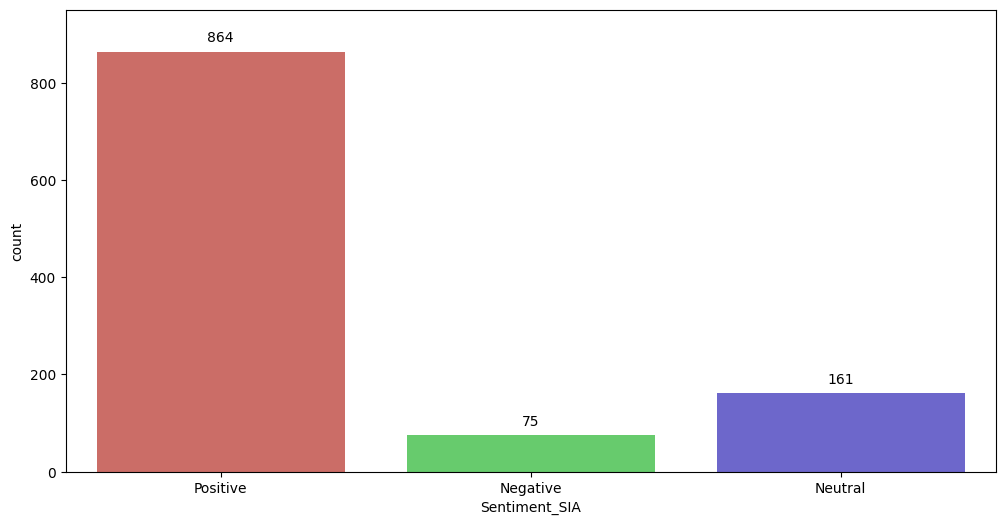

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get max count from the dataframe
max_count = sent_df1['Sentiment_SIA'].value_counts().max()

plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Sentiment_SIA', data=sent_df1, palette='hls')

# Set y-axis limits slightly higher than the max count
plt.ylim(0, max_count + max_count * 0.1)  # Add a 10% buffer

# Annotate each bar with its count as integer
for p in ax.patches:
  ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
              ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")


type_ = ["Positive", "Negative", "Neutral"]
fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Pie(labels=type_, values=sent_df1['Sentiment_SIA'].value_counts(), name="sentiment"))

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Sentiment Analysis",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='SIA', x=0.5, y=0.5, font_size=40, showarrow=False)],
    width=800,  # Adjust the width as desired
    height=600  # Adjust the height as desired
)

fig.show()

In [ ]:
# Example usage:
reviews = [
    "I love this product, it's fantastic!",
    "This is the worst purchase I've ever made.",
    "Absolutely amazing and worth every penny.",
    "I'm very disappointed with this item.",
    "Great value for money, highly recommend!",
    "Not satisfied with the quality at all."
]

for review in reviews:
    score = analyze_sentiment(review)
    print(f"Review: {review}\nPredicted Sentiment Score: {score}\n")

Review: I love this product, it's fantastic!
Predicted Sentiment Score: 0.8439

Review: This is the worst purchase I've ever made.
Predicted Sentiment Score: -0.6249

Review: Absolutely amazing and worth every penny.
Predicted Sentiment Score: 0.7397

Review: I'm very disappointed with this item.
Predicted Sentiment Score: -0.5256

Review: Great value for money, highly recommend!
Predicted Sentiment Score: 0.862

Review: Not satisfied with the quality at all.
Predicted Sentiment Score: -0.3252



In [ ]:
df_a = sent_df1.copy()  # Create a copy of sent_df1
df_a

,sentence,word_count,Sentiment_score,Sentiment_SIA
0,love echo,2,0.6369,Positive
1,loved,1,0.5994,Positive
2,playing game answer question correctly alexa w...,10,-0.3182,Negative
3,lot fun thing yr learns dinosaur control light...,15,0.8519,Positive
4,music,1,0.0000,Neutral
...,...,...,...,...
1095,love echo spot,3,0.6369,Positive
1096,great deal great product,4,0.8481,Positive
1097,perfect,1,0.5719,Positive
1098,couple echo dot bought ring doorbell video clo...,39,0.8817,Positive


In [ ]:
df.to_csv('df_a.csv')

# Use the following command to download the file
from google.colab import files
files.download('df_a.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print(df['Sentiment_SIA'].value_counts())

Sentiment_SIA
Positive    864
Neutral     161
Negative     75
Name: count, dtype: int64


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import re

# Constants
STOPWORDS = set(stopwords.words('english'))
#DATA_PATH = r"C:\Users\abhishek\Desktop\NLP_project\df.csv"

# Load data
#df6 = pd.read_csv(DATA_PATH)

# Print column names to identify the issue
print("Column names in the dataset:")
print(df_a.columns)

# Assuming 'Sentiment_SIA' is the correct column, if not, replace with the correct one
if 'Sentiment_SIA' not in df_a.columns:
    raise KeyError("The column 'Sentiment_SIA' is not present in the dataset. Please check the column names.")

# Check class distribution
print(df_a['Sentiment_SIA'].value_counts())

# Label encoding
label_encoder = LabelEncoder()
df_a['Sentiment_Encoded'] = label_encoder.fit_transform(df_a['Sentiment_SIA'])

# Drop NA values
df_a = df_a.dropna(axis=0, how='any')

# Text preprocessing and stemming
stemmer = PorterStemmer()
corpus = []
for i in range(df.shape[0]):
    review = re.sub('[^a-zA-Z]', ' ', df_a.iloc[i]['sentence'])
    review = review.lower().split()
    review = [stemmer.stem(word) for word in review if word not in STOPWORDS]
    review = ' '.join(review)
    corpus.append(review)

# Feature extraction using TF-IDF Vectorizer
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(corpus).toarray()
Y = df_a['Sentiment_Encoded'].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=15)

# Scale features
scaler = MinMaxScaler()
X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

# Train model
model_nb = MultinomialNB(alpha=1.0)
model_nb.fit(X_train_scl, y_train)

# Model evaluation
y_pred_train = model_nb.predict(X_train_scl)
y_pred_test = model_nb.predict(X_test_scl)

print("Training Classification Report:")
print(classification_report(y_train, y_pred_train))

print("Testing Classification Report:")
print(classification_report(y_test, y_pred_test))

print("Confusion Matrix on Test Data:")
print(confusion_matrix(y_test, y_pred_test))

def preprocess_text(text):
    """Preprocess the input text for prediction."""
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower().split()
    text = [stemmer.stem(word) for word in text if word not in STOPWORDS]
    return ' '.join(text)

def naive_bayes_model(user_input):
    """Predict sentiment using the trained Naive Bayes model."""
    preprocessed_text = preprocess_text(user_input)
    text_vector = tfidf.transform([preprocessed_text]).toarray()
    text_vector_scaled = scaler.transform(text_vector)
    prediction = model_nb.predict(text_vector_scaled)
    result = label_encoder.inverse_transform(prediction)
    return result[0]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Column names in the dataset:
Index(['sentence', 'word_count', 'Sentiment_score', 'Sentiment_SIA'], dtype='object')
Sentiment_SIA
Positive    864
Neutral     161
Negative     75
Name: count, dtype: int64
Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.53      0.70        60
           1       0.87      0.31      0.46       109
           2       0.85      0.99      0.92       601

    accuracy                           0.86       770
   macro avg       0.91      0.61      0.69       770
weighted avg       0.87      0.86      0.83       770

Testing Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.53      0.67        15
           1       0.64      0.17      0.27        52
           2       0.84      0.98      0.91       263

    accuracy                           0.83       330
   macro avg       0.79      0.56      0.61       330
weighted avg       0.81    

The analysis reveals overwhelmingly positive sentiment among reviews, with **78.5%** expressing positivity, while negative and neutral sentiments constitute nly **14.6%** and **6.82%** respectively.

#  

# 3. **Sentiment Analysis Using TextBlob**

In [ ]:
sent_df2 = sent_df[['sentence', 'word_count']]
sent_df2

,sentence,word_count
0,love echo,2
1,loved,1
2,playing game answer question correctly alexa w...,10
3,lot fun thing yr learns dinosaur control light...,15
4,music,1
...,...,...
1095,love echo spot,3
1096,great deal great product,4
1097,perfect,1
1098,couple echo dot bought ring doorbell video clo...,39


In [ ]:
import pandas as pd
from textblob import TextBlob

def get_sentiment_and_score(text):
    analysis = TextBlob(text)
    sentiment = 'Positive' if analysis.sentiment.polarity > 0 else 'Negative' if analysis.sentiment.polarity < 0 else 'Neutral'
    return pd.Series([analysis.sentiment.polarity, sentiment], index=['Sentiment_Score', 'Sentiment_textblob'])

# Apply sentiment analysis and create new columns 'Sentiment_Score' and 'Sentiment_textblob'
sent_df2[['Sentiment_Score', 'Sentiment_textblob']] = sent_df2['sentence'].apply(get_sentiment_and_score)
sent_df2

,sentence,word_count,Sentiment_Score,Sentiment_textblob
0,love echo,2,0.500000,Positive
1,loved,1,0.700000,Positive
2,playing game answer question correctly alexa w...,10,-0.166667,Negative
3,lot fun thing yr learns dinosaur control light...,15,0.260000,Positive
4,music,1,0.000000,Neutral
...,...,...,...,...
1095,love echo spot,3,0.500000,Positive
1096,great deal great product,4,0.800000,Positive
1097,perfect,1,1.000000,Positive
1098,couple echo dot bought ring doorbell video clo...,39,0.112500,Positive


In [ ]:
df_b = sent_df2.copy()  # Create a copy of sent_df1
df_b

,sentence,word_count,Sentiment_Score,Sentiment_textblob
0,love echo,2,0.500000,Positive
1,loved,1,0.700000,Positive
2,playing game answer question correctly alexa w...,10,-0.166667,Negative
3,lot fun thing yr learns dinosaur control light...,15,0.260000,Positive
4,music,1,0.000000,Neutral
...,...,...,...,...
1095,love echo spot,3,0.500000,Positive
1096,great deal great product,4,0.800000,Positive
1097,perfect,1,1.000000,Positive
1098,couple echo dot bought ring doorbell video clo...,39,0.112500,Positive


In [ ]:
df.to_csv('df_b.csv')

# Use the following command to download the file
from google.colab import files
files.download('df_b.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

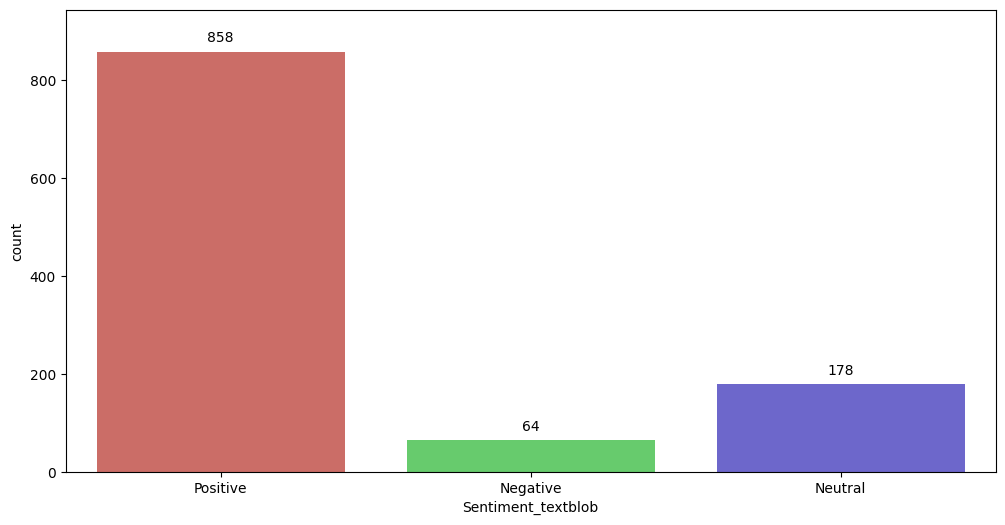

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get max count from the dataframe
max_count = sent_df2['Sentiment_textblob'].value_counts().max()

plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Sentiment_textblob', data=sent_df2, palette='hls')

# Set y-axis limits slightly higher than the max count
plt.ylim(0, max_count + max_count * 0.1)  # Add a 10% buffer

# Annotate each bar with its count as integer
for p in ax.patches:
  ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
              ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")


type_ = ["Positive", "Negative", "Neutral"]
fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Pie(labels=type_, values=sent_df2['Sentiment_textblob'].value_counts(), name="sentiment"))

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.45, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Sentiment Analysis",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Textblob', x=0.5, y=0.5, font_size=35, showarrow=False)],
    width=800,  # Adjust the width as desired
    height=600  # Adjust the height as desired
)

fig.show()

The analysis reveals overwhelmingly positive sentiment among reviews, with **78%** expressing positivity,  while negative and neutral sentiments constitute nly **16.2%** and **5.82%** respectively.

#           

In [ ]:
# Example usage:
reviews = [
    "I love this product, it's fantastic!",
    "This is the worst purchase I've ever made.",
    "Absolutely amazing and worth every penny.",
    "I'm very disappointed with this item.",
    "Great value for money, highly recommend!",
    "Not satisfied with the quality at all."
]

for review in reviews:
    score = get_sentiment_and_score(review)
    print(f"Review: {review}\nPredicted Sentiment Score: {score}\n")

Review: I love this product, it's fantastic!
Predicted Sentiment Score: Sentiment_Score            0.5
Sentiment_textblob    Positive
dtype: object

Review: This is the worst purchase I've ever made.
Predicted Sentiment Score: Sentiment_Score           -1.0
Sentiment_textblob    Negative
dtype: object

Review: Absolutely amazing and worth every penny.
Predicted Sentiment Score: Sentiment_Score           0.45
Sentiment_textblob    Positive
dtype: object

Review: I'm very disappointed with this item.
Predicted Sentiment Score: Sentiment_Score         -0.975
Sentiment_textblob    Negative
dtype: object

Review: Great value for money, highly recommend!
Predicted Sentiment Score: Sentiment_Score            0.5
Sentiment_textblob    Positive
dtype: object

Review: Not satisfied with the quality at all.
Predicted Sentiment Score: Sentiment_Score          -0.25
Sentiment_textblob    Negative
dtype: object



In [ ]:

# Import required modules
from textblob import TextBlob

reviews = [
    "I love this product, it's fantastic!",
    "This is the worst purchase I've ever made.",
    "Absolutely amazing and worth every penny.",
    "I'm very disappointed with this item.",
    "Great value for money, highly recommend!",
    "Not satisfied with the quality at all."
]

for review in reviews:
    blob = TextBlob(review)  # Create a TextBlob object to analyze sentiment
    score = blob.sentiment.polarity  # Get the sentiment polarity score (-1 to 1)
    sentiment = get_sentiment(score)  # Pass the score to your get_sentiment function
    print(f"Review: {review}\nPredicted Sentiment Score: {sentiment}\n")

Review: I love this product, it's fantastic!
Predicted Sentiment Score: Positive

Review: This is the worst purchase I've ever made.
Predicted Sentiment Score: Negative

Review: Absolutely amazing and worth every penny.
Predicted Sentiment Score: Positive

Review: I'm very disappointed with this item.
Predicted Sentiment Score: Negative

Review: Great value for money, highly recommend!
Predicted Sentiment Score: Positive

Review: Not satisfied with the quality at all.
Predicted Sentiment Score: Negative

